In [20]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data/images/COVER-IMAGE.png',0)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [174]:
x0,x1,y0,y1 = (195,490,831,970)

In [175]:
crop = img[y0:y1,x0:x1]

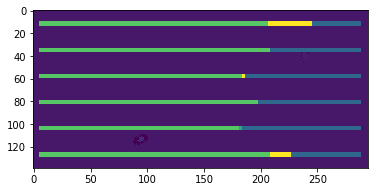

In [176]:
plt.imshow(crop)

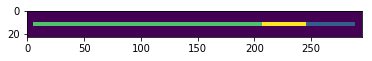

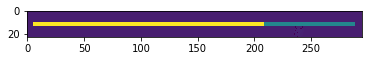

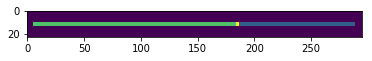

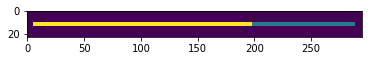

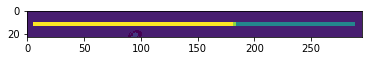

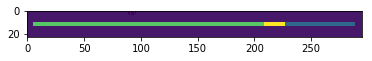

In [177]:
slice_size = round(crop.shape[0]/6)
lib = []

for i in range(0,6):
    start = i * slice_size
    end = start + slice_size
    s = crop[start:end,:]
    plt.figure()
    plt.imshow(s)
    lib.append(s)
    

In [203]:
def color_classifier(segment):
    colors = {}
    values = ['border','base','boost','break','remain']
    for each in values:
        colors[each] = 0
        
    for each in segment:
        if each < 40:
            colors['border'] += 1
        elif each < 70:
            colors['remain'] += 1
        elif each < 110:
            colors['break'] += 1
        elif each < 145:
            colors['base'] += 1
        else:
            colors['boost'] += 1
    total = colors['base'] + colors['boost'] + colors['break'] + colors['remain']
    value = colors['base'] + colors['boost'] - colors['break']
    add = colors['boost']
    weak = colors['break']
    value_pct = round(value*100 / total,2)
    add_pct = round(add*100 / total,2)
    weak_pct = round(weak*100 / total,2)
    return value_pct, add_pct, weak_pct
            

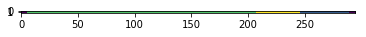

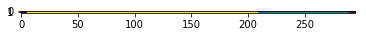

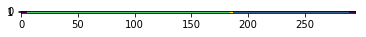

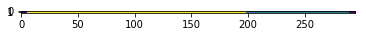

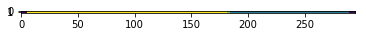

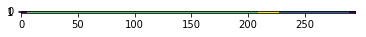

In [204]:
stats = {}
for i,each in enumerate(lib):
    mid = round(each.shape[0]/2)
    arr = each[mid,:]
    arr2 = each[mid-1:mid+1,:]
    plt.figure()
    plt.imshow(arr2)
    stats[categories[i]] = color_classifier(arr)

In [205]:
categories = ['Accuracy','Damage','Range','Fire Rate','Mobility','Control']

In [206]:
stats

{'Accuracy': (84.86, 13.73, 0.0),
 'Damage': (71.83, 0.0, 0.0),
 'Range': (64.08, 1.06, 0.0),
 'Fire Rate': (67.96, 0.0, 0.0),
 'Mobility': (60.92, 0.0, 1.06),
 'Control': (78.17, 6.34, 0.0)}

In [213]:
lib[0][12]

array([ 11,  11,  11,  11,  11, 129, 129, 129, 129, 129, 129, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 12

In [215]:
from os import listdir
from os.path import isfile, join
mypath = 'data/images/M4A1'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [216]:
onlyfiles

['M4A1-STOCK-SINGUARD-ARMS-INVADER.png',
 'M4A1-GRIP-GRANULATED-GRIP-TAPE.png',
 'M4A1-LASER-1MW-LASER.png',
 'M4A1-MUZZLE-COMPENSATOR.png',
 'M4A1-LASER-TAC-LASER.png',
 'M4A1-MUZZLE-LIGHTWEIGHT-SUPPRESSOR.png',
 'M4A1-BASE.png',
 'M4A1-BARREL-CORVUS-CUSTOM-MARKSMAN.png',
 'M4A1-MUZZLE-BREACHER-DEVICE.png',
 'M4A1-STOCK-FORGE-TAC-CQS.png',
 'M4A1-BARREL-FSS-11.5-COMMANDO.png',
 'M4A1-UNDERBARREL-MERC-FOREGRIP.png',
 'M4A1-MUZZLE-MUZZLE-BREAK.png',
 'M4A1-MUZZLE-FLASH-HIDER.png',
 'M4A1-BARREL-STOCK-M16-GRENADIER.png',
 'M4A1-STOCK-M16-STOCK.png',
 'M4A1-MUZZLE-MONOLITHIC-SUPPRESSOR.png',
 'M4A1-LASER-5MW-LASER.png',
 'M4A1-GRIP-STIPPLED-GRIP-TAPE.png',
 'M4A1-GRIP-RUBBERIZED-GRIP-TAPE.png',
 'M4A1-STOCK-NO-STOCK.png',
 'M4A1-UNDERBARREL-COMMANDO-FOREGRIP.png',
 'M4A1-BARREL-FSS-12.4-PREDATOR.png',
 'M4A1-UNDERBARREL-RANGER-FOREGRIP.png',
 'M4A1-UNDERBARREL-TACTICAL-FOREGRIP.png',
 'M4A1-MUZZLE-TACTICAL-SUPPRESSOR.png',
 'M4A1-UNDERBARREL-OPERATOR-FOREGRIP.png',
 'M4A1-BARREL-FSS-14.5-

In [218]:
attachment = onlyfiles[0]
category = attachment.split('-')[1]
name = '_'.join(attachment.split('.')[0].split('-')[2:])

In [219]:
name

'SINGUARD_ARMS_INVADER'